### Marshall, Colorado, USA

**Station Name:** p041 

**Location:** Boulder, CO, USA

**Archive:** [UNAVCO](http://www.unavco.org)

**DOI:**  	[https://doi.org/10.7283/T5R49NQQ](https://doi.org/10.7283/T5R49NQQ)

**Ellipsoidal Coordinates:**

- Latitude: 39.94949

- Longitude: -105.19427

- Height: 1728.842 m

[Station Page at UNAVCO](https://www.unavco.org/instrumentation/networks/status/nota/overview/P041)

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/P041.sta)

[Google Map Link](https://goo.gl/maps/GwGV8PS4CQVQzYHC7) 

<img src="https://gnss-reflections.org/static/images/P041.jpg" width="500">

In [2]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

environment variable ORBITS set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits 
environment variable REFL_CODE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks 
environment variable EXE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks
Your executable environment area:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
There is no teqc executable for this architecture, so none will be installed.
This Hatanaka executable already exists
The gfzrnx executable already exists


**Fast Mode:** 
this will download data weekly instead of daily

In [3]:
weekly = widgets.Checkbox(value=True, description='Fast Mode', disabled=False, indent=False)
weekly

Checkbox(value=True, description='Fast Mode', indent=False)

Deselect the Fast Mode checkbox to deactivate fast mode.

## Data Summary

The p041 antenna is ~2 meters above the soil surface. It is located at Marshall Mesa, Colorado.
The site is relatively planar and free of obstructions. Since October 2018 the site has 
recorded multi-GNSS signals. Marshall Mesa has been featured in multiple publications on GNSS-IR:

* [Use of GPS Receivers as a Soil Moisture Network for Water Cycle Studies (2008)](https://www.kristinelarson.net/wp-content/uploads/2015/10/larson_soil_grl2008.pdf)

* [Can We Measure Snow Depth with GPS Receivers (2009)](https://www.kristinelarson.net/wp-content/uploads/2015/10/larsonetal_snow_2009.pdf) 

* [Sensing Vegetation Growth with Reflected GPS Signals (2010)](https://www.kristinelarson.net/wp-content/uploads/2015/10/small_etal_2010.pdf) 

### Web App

More information on the station can be obtained from the GNSS-IR Web App, where p041 is one of the example cases for soil moisture and snow depth. [Please note that the app will be analyzing data in real-time, so please wait for the periodogram to appear on the left side of the page. It takes about 5 seconds](https://gnss-reflections.org/fancy6?example=p041). The web app will return a photograph, station coordinates, a Google Earth Map, and a sample periodogram. The periodogram plots the reflector height (RH) in four quadrants (NW, NE, SW, SE), allowing the reflection characteristics and quality of the site to be inferred. For example, variations in topography or buildings blocking the reflections could all affect the periodograms.

In [ ]:
%%html
<iframe src="https://gnss-reflections.org/api?example=p041" width="1000" height="900"></iframe>

### Setting Azimuth and Elevation Mask

To get a sense of whether an azimuth or elevation mask is appropriate, check the [Reflection Zone Mapping in the web app](https://gnss-reflections.org/rzones?station=p041&lat=39.9495&lon=-105.1943&height=1728.842&msl=on&RH=2&eang=2&azim1=0&azim2=360).  
In the linked page, the reflection zones at 5, 10, and 15-degree elevation angles are plotted as colored ellipses surrounding the station, all overlaid on a Google Earth map.  Higher elevation angles are closer to the station.
As can be seen from the Google Earth map, this site is relatively flat with no major obstacles to interfere with reflected signals.  Therefore the elevation angles can be left at default settings and no azimuth masks are required.

In [ ]:
%%html
<iframe src="https://gnss-reflections.org/rzones?station=p041&lat=39.9495&lon=-105.1943&height=1728.842&msl=on&RH=2&eang=2&azim1=0&azim2=360" width="950" height="500"></iframe>

### Make SNR File

Begin by making an SNR file. We'll look at the year 2020 and day of year 132

In [4]:
station = 'p041'
year = 2020 
doy = 132

In [5]:
rinex2snr(station, year, doy)

p041  year: 2020  doy: 132 from:  all
Requested a GPS only nav file
100% [..............................................................................] 74957 / 74957found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/nav/auto1320.20n
https://data.unavco.org/archive/gnss/rinex/obs/2020/132/p0411320.20d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/p041/p0411320.20.snr66
That took  3.11  seconds
Feedback written to subdirectory logs


### Take a Quick Look at the Data

Then use **quickLook** to analyze the reflection characteristics of the site [(For details on quickLook output)](../../docs/quickLook_desc.md).

The default return is for the L1 frequency:

minimum elevation angle (degrees) for this dataset:  0.0035
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_summary.png


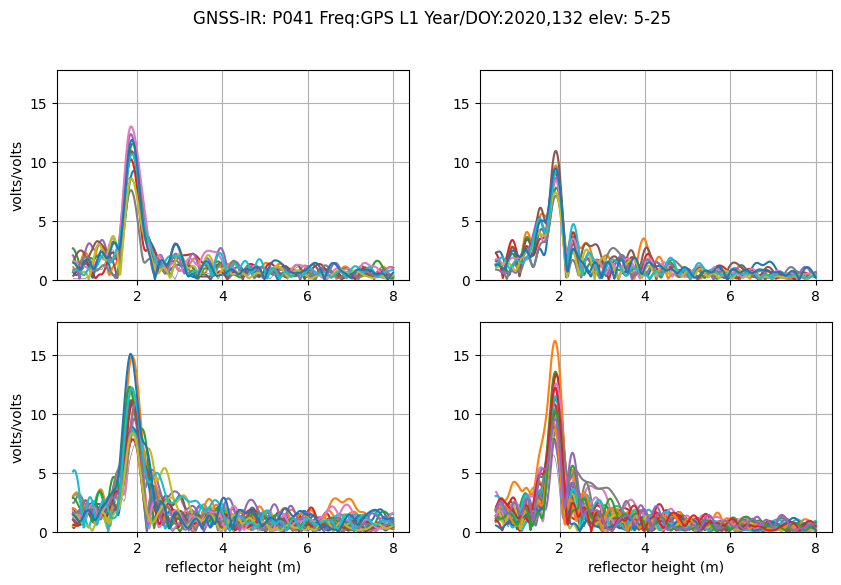

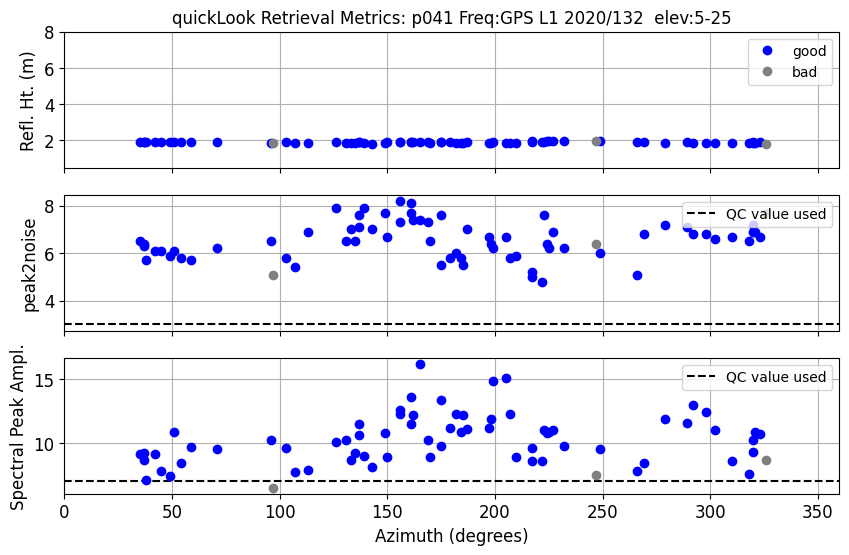

In [6]:
values, metrics = quicklook(station, year, doy=doy)

Now try looking at the periodogram for L2C:

minimum elevation angle (degrees) for this dataset:  0.0035
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_summary.png


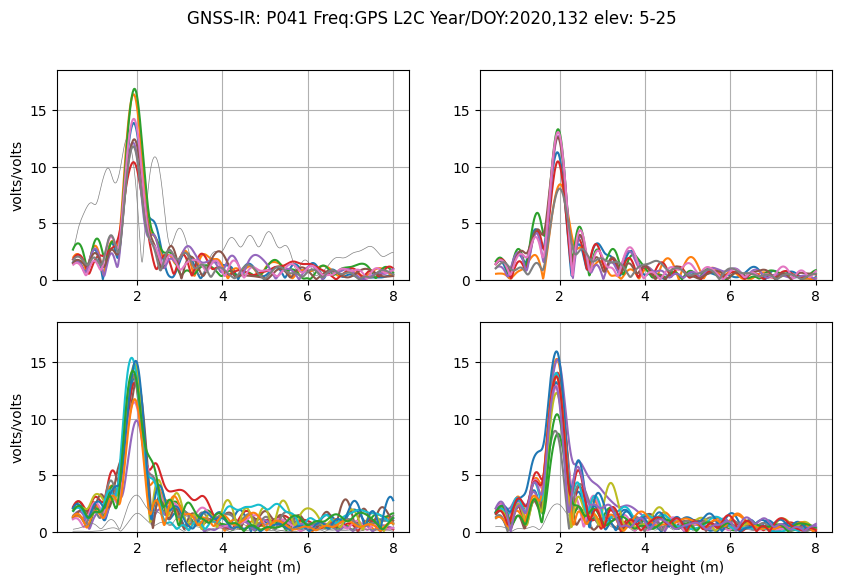

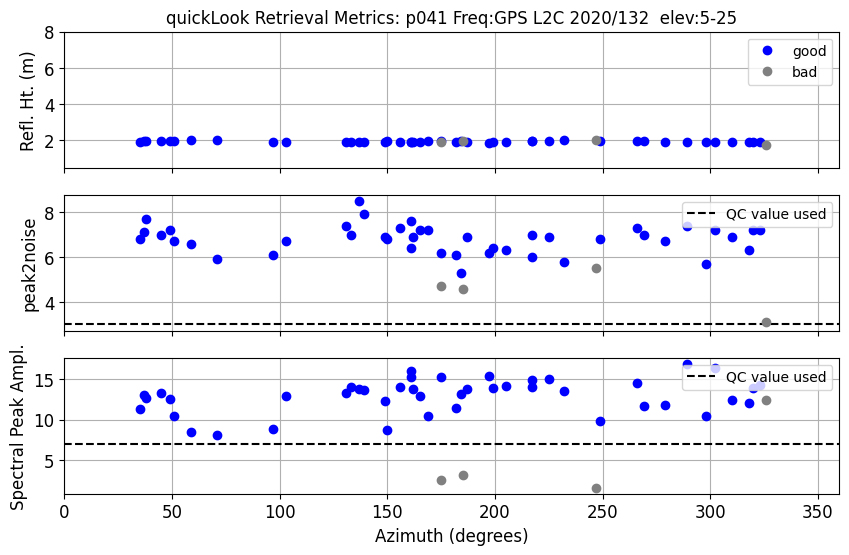

In [7]:
values, metrics = quicklook(station, year, doy=doy, fr=20)

Note that there are more colors in the L1 plots than in the L2C plots. That is the result of the fact that there are more L1 satellites than L2C satellites.

Now try L5:

minimum elevation angle (degrees) for this dataset:  0.0035
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_summary.png


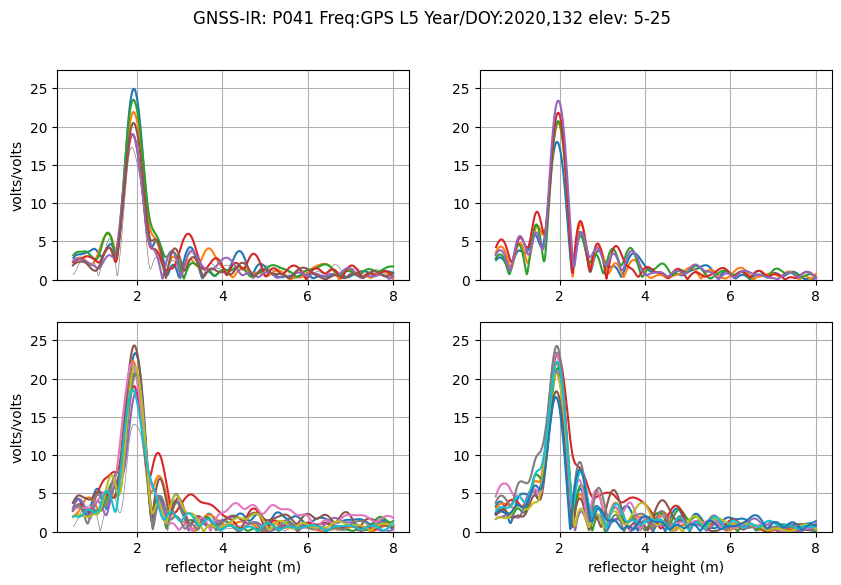

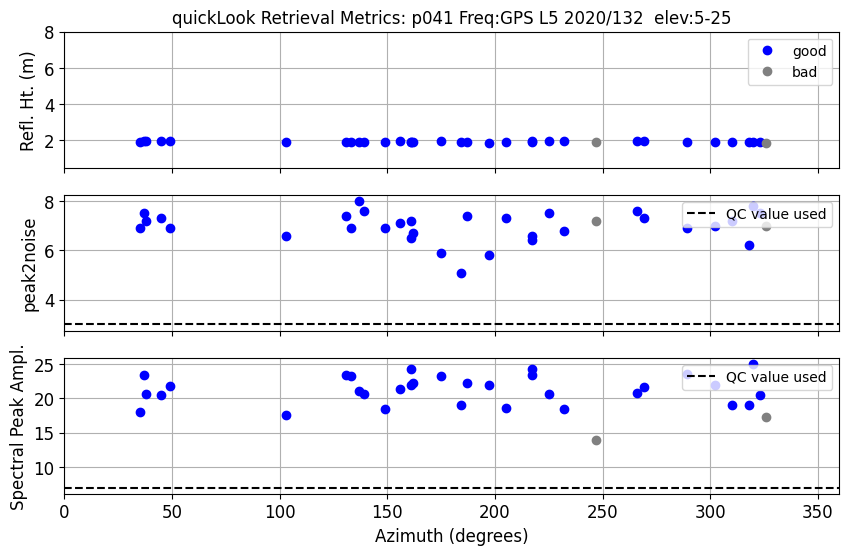

In [8]:
values, metrics = quicklook(station, year, doy=doy, fr=5)

The L5 signal has only been available on satellites launched after 2010, so there are
fewer satellite tracks than either L1 or L2C.

The *quickLook* code has multiple options. For example, it is possible change the reflector height range:

minimum elevation angle (degrees) for this dataset:  0.0035
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_summary.png


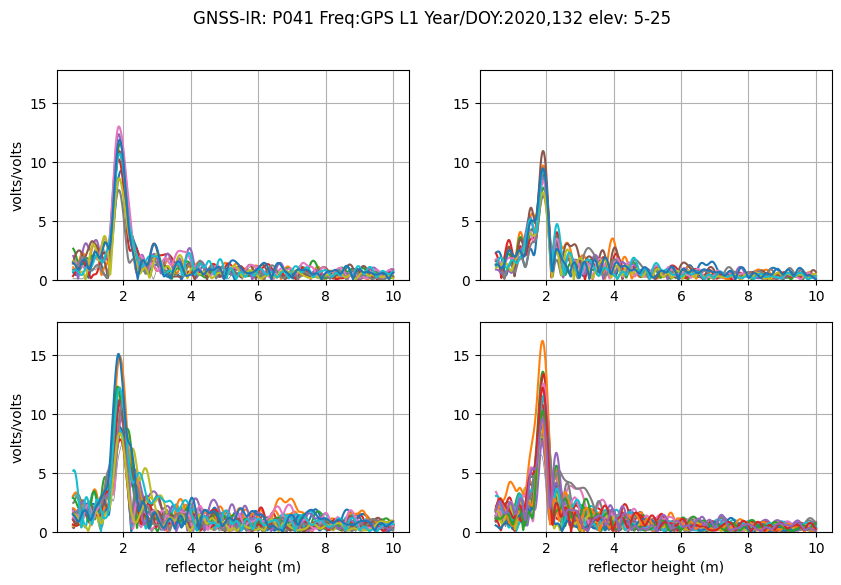

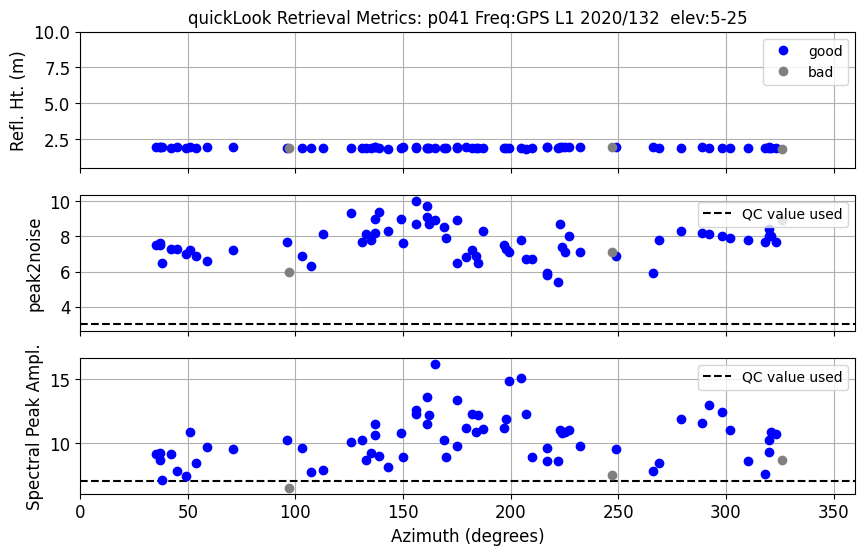

In [9]:
values, metrics = quicklook(station, year, doy=doy, h1=0.5, h2=10)

To look at Glonass and Galileo signals, the SNR files must be created using the -orb gnss flag.
If you have already made a file using only the GPS data, you will need the overwrite flag.

In [10]:
rinex2snr(station, year, doy, orb='gnss', overwrite=True)

Using GBM orbit archived at CDDIS
File exists, you requested overwriting, so will delete existing file
p041  year: 2020  doy: 132 from:  all
sp3 filename  gbm21051.sp3
/gps/products/mgex/2105/ GFZ0MGXRAP_20201320000_01D_05M_ORB.SP3.gz
/gps/products/2105/ GFZ0MGXRAP_20201320000_01D_05M_ORB.SP3.gz
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/sp3/GFZ0MGXRAP_20201320000_01D_05M_ORB.SP3
https://data.unavco.org/archive/gnss/rinex/obs/2020/132/p0411320.20d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/p041/p0411320.20.snr66
That took  5.44  seconds
Feedback written to subdirectory logs


minimum elevation angle (degrees) for this dataset:  0.0007
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/quickLook_summary.png


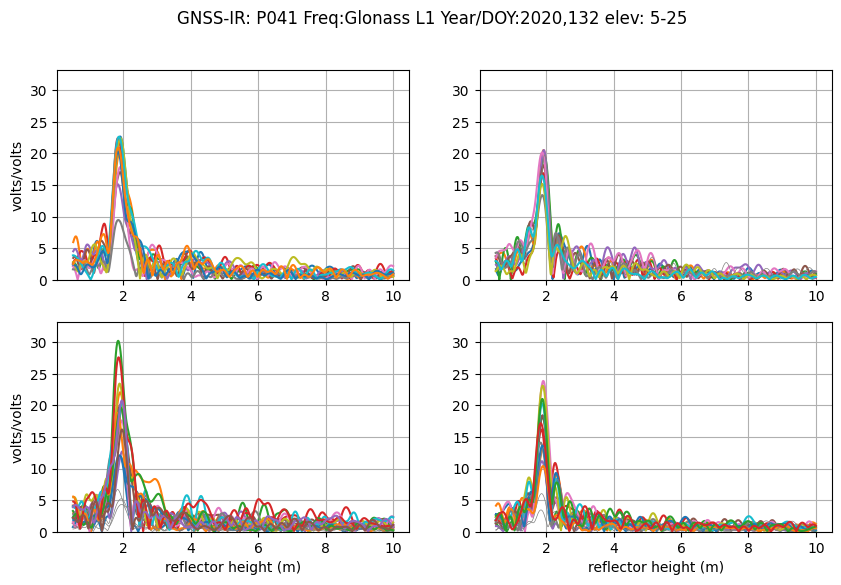

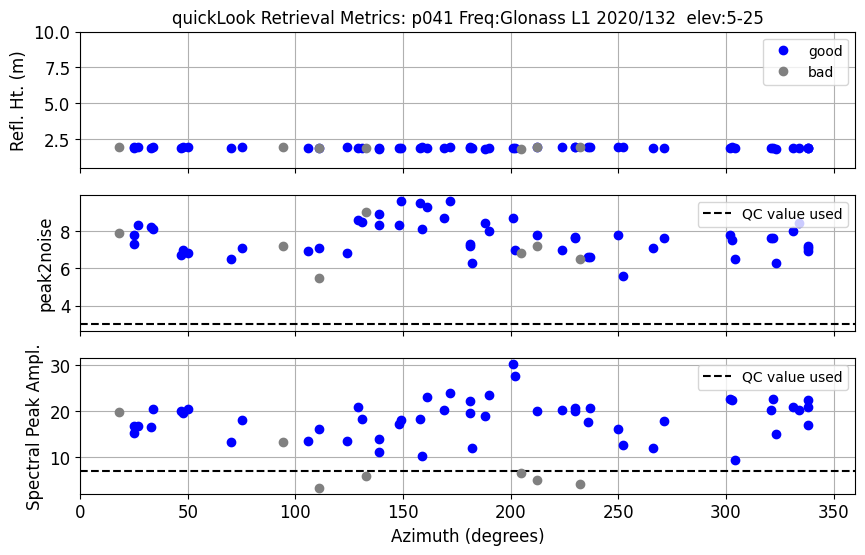

In [11]:
values, metrics = quicklook(station, year, doy=doy, h1=0.5, h2=10, fr=101)

Beidou signals are tracked at this site, but unfortunately the data are not available in the RINEX 2.11 file.
They are very likely available in the RINEX 3 file, so you are encouraged to look there.

`quickLook` is meant to be a visual assessment of the spectral characteristics at a given site on a given day. For routine analysis, one must use  `gnssir`.

## Analyze the Data

We will start by setting up the analysis parameters. These are stored in a json file. In this case, the p041 RINEX data are multi-gnss, so you could set the options to allow all frequencies from all constellations. Here we are going to concentrate on GPS-only, which is the default. We have set stricter QC values by setting the amplitude minimum to 8 and the peak 2 noise ratio to 3.2:

In [12]:
make_gnssir_input(station, peak2noise=3.2, ampl=8, allfreq=True)

Assume you want to use the UNR database.
Using standard frequency choices.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/p041.json


We are going to look at a subset of p041 data from 2019/2020 to look at changes due to
snow accumulation. The series will begin doy 245 (2019) and end on doy 70 (2020).

In [15]:
rinex2snr(station, year=2019, doy=245, doy_end=70, year_end=2020, archive='unavco', weekly=weekly.value)

You have invoked the weekly option
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412450.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412520.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412590.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412660.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412730.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412800.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412870.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0412940.19.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/p041/p0413010.19

Now run gnssir for 2019/2020:

In [16]:
gnssir(station, year=2019, doy=1, doy_end=366, year_end=2020)

{'station': 'p041', 'lat': 39.949492042, 'lon': -105.194266387, 'ht': 1728.8555755, 'minH': 0.5, 'maxH': 8.0, 'e1': 5.0, 'e2': 25.0, 'NReg': [0.5, 8.0], 'PkNoise': 3.2, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [0, 360], 'freqs': [1, 20, 5, 101, 102, 201, 205, 206, 207, 208, 302, 306], 'reqAmp': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'p041_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [1, 20, 5, 101, 102, 201, 205, 206, 207, 208, 302, 306]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [0, 360]
Using azimuths:  [0, 360]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/p041_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/

Typically a daily average is sufficient for climatology studies.
To ensure the average is meaningful and not impacted by large outliers,
a median filter (meters) is used and a minimum number of tracks is required. Here a median filter of 0.15 meter is used and 80 tracks are required. Either of these parameters can be changed depending on your site.
In this particular example, I only used three GPS frequencies, L1, L2C, and L5.

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_allRH.txt 

A total of  29  days were evaluated.
4  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p

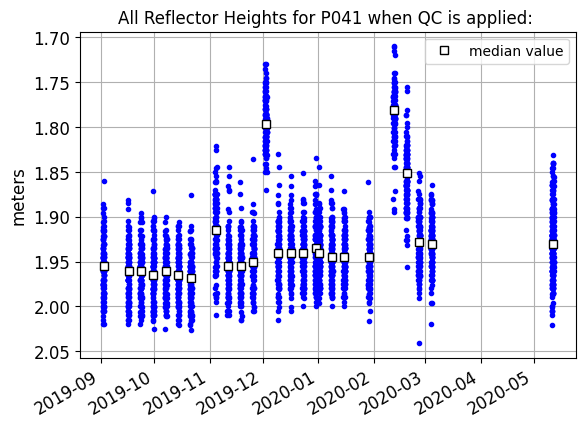

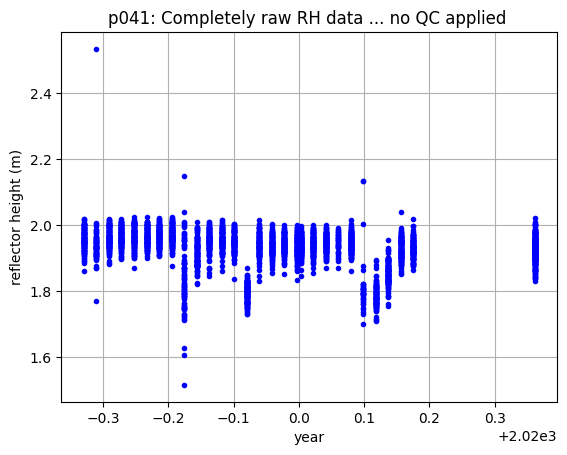

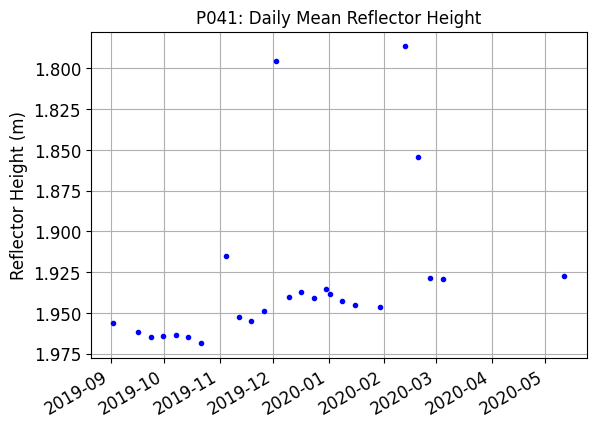

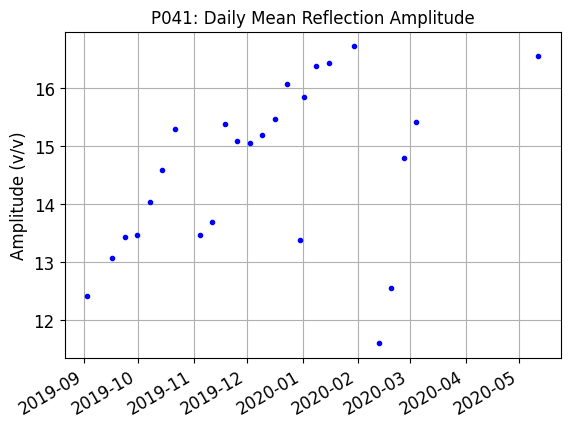

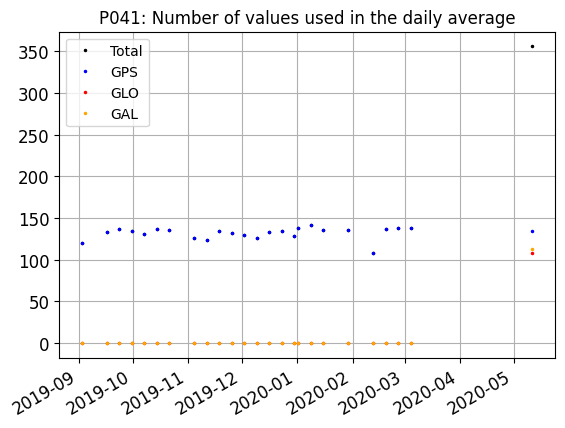


Daily average RH file written to:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/p041/p041_dailyRH.txt


In [17]:
daily_avg(station, medfilter=.15, ReqTracks=80)